In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [30]:
np.random.seed(42)

## Training data for 5 scenarios

* Modeling errors only
* Corrupt X, small deviants
* Corrupt y, small deviants
* Corrupt X, large deviants
* Corrupt y, large deviants

In [31]:
X = np.random.normal(size=400)
y = np.sin(X)
X = X[:, np.newaxis]

In [35]:
y_errors = y.copy()
y_errors[::3] = 3

In [36]:
X_errors = X.copy()
X_errors[::3] = 3

In [37]:
y_errors_large = y.copy()
y_errors_large[::3] = 10

In [38]:
X_errors_large = X.copy()
X_errors_large[::3] = 10

## Test data

In [ ]:
X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

## Four different modeling methods (estimators)

In [39]:
estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ('HuberRegressor', HuberRegressor())]

In [40]:
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3

In [41]:
x_plot = np.linspace(X.min(), X.max())

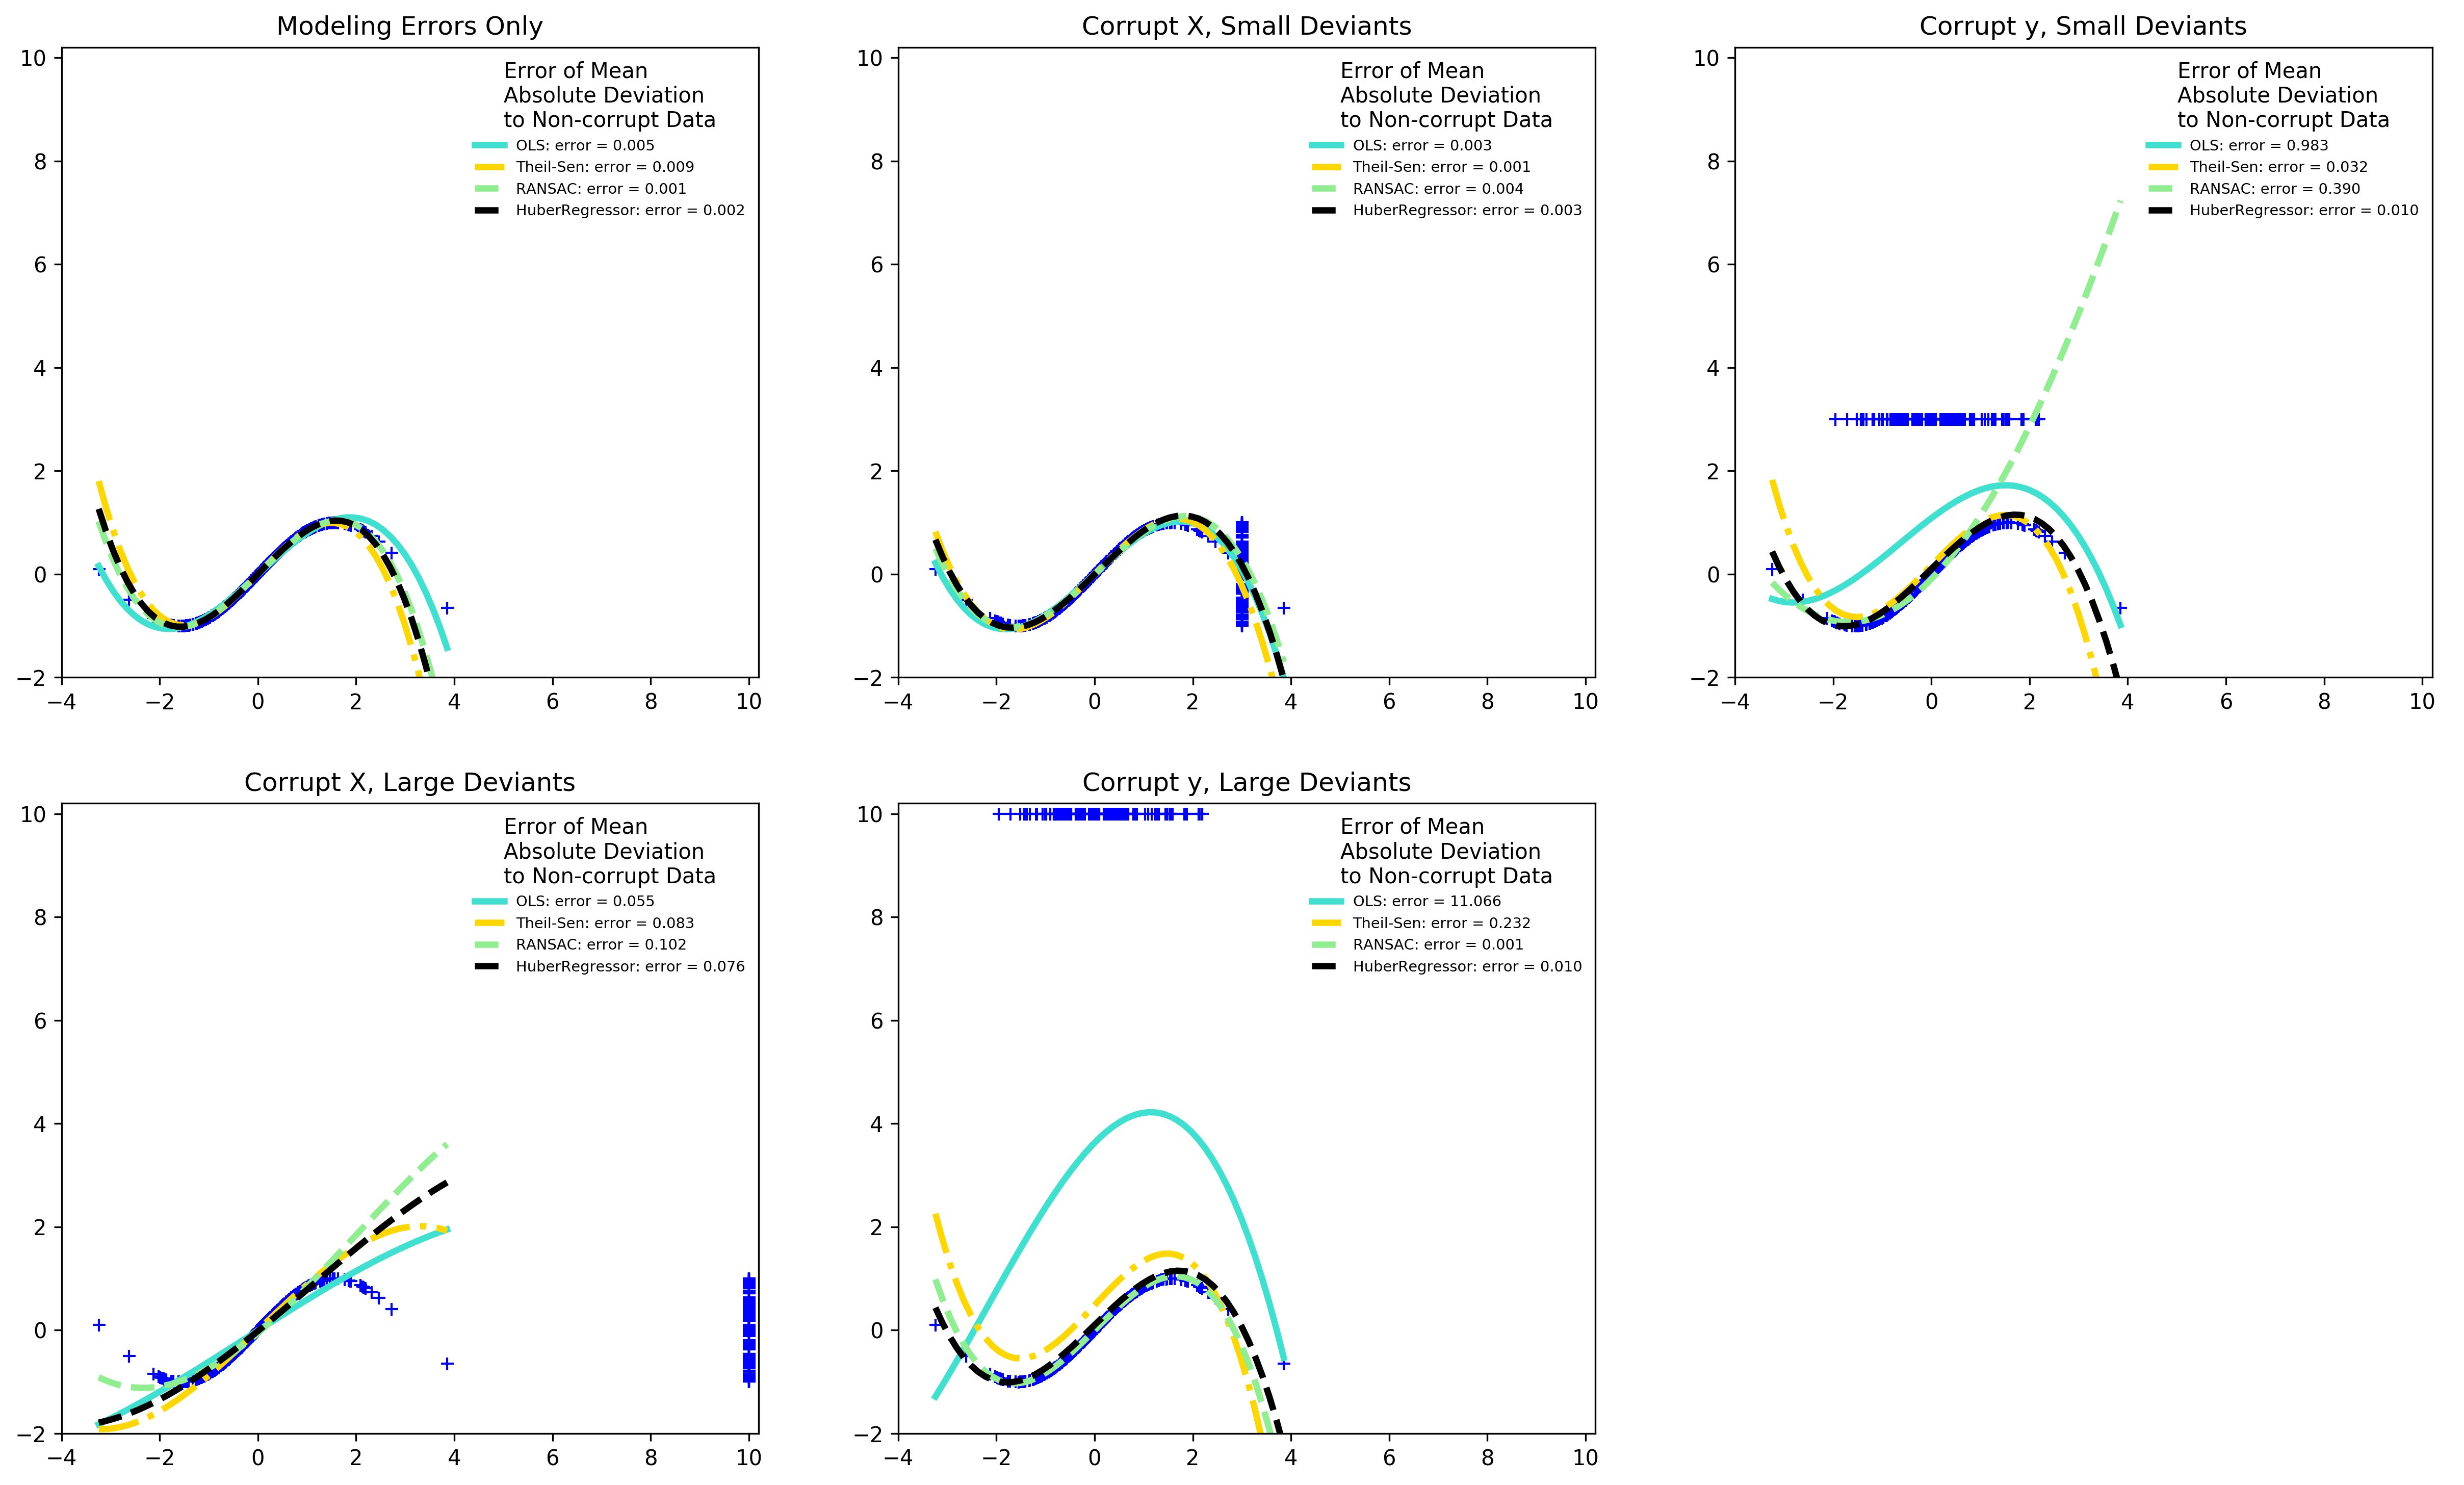

In [58]:
fig, splots = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.set_dpi(300)
for title, this_X, this_y, sp in [
    ('Modeling Errors Only', X, y, splots[0, 0]),
    ('Corrupt X, Small Deviants', X_errors, y, splots[0, 1]),
    ('Corrupt y, Small Deviants', X, y_errors, splots[0, 2]),
    ('Corrupt X, Large Deviants', X_errors_large, y, splots[1, 0]),
    ('Corrupt y, Large Deviants', X, y_errors_large, splots[1, 1])]:
    sp.plot(this_X[:, 0], this_y, 'b+')
    sp.axes.set_xlim(-4, 10.2)
    sp.axes.set_ylim(-2, 10.2)
    sp.axes.set_title(title)
    
    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        line, = sp.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                       linewidth=lw)
        line.set_label('%s: error = %.3f' % (name, mse))
        
        legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
        legend = sp.legend(loc='upper right', frameon=False, title=legend_title,
                            prop=dict(size='x-small'))
    
splots[1,2].axes.set_axis_off()
plt.show()